# Importing Necessary Libraries

In [3]:
import pandas as pd
import numpy as np
import nltk
from nltk.stem.porter import *
import re
from wordsegment import load, segment, clean
load() #loading segment
import matplotlib.pyplot as plt
from keras.preprocessing.sequence import pad_sequences
%matplotlib inline

# Reading the dataset and Data Exploration

In [4]:
df = pd.read_csv('labeled_data-updated.csv',header = 'infer') 

In [5]:
df

tweet  Class Label
0      !!! RT @mayasolovely: As a woman you shouldn't...            2
1      !!!!! RT @mleew17: boy dats cold...tyga dwn ba...            1
2      !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...            1
3      !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...            1
4      !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...            1
...                                                  ...          ...
24778  you's a muthaf***in lie &#8220;@LifeAsKing: @2...            1
24779  you've gone and broke the wrong heart baby, an...            2
24780  young buck wanna eat!!.. dat nigguh like I ain...            1
24781              youu got wild bitches tellin you lies            1
24782  ~~Ruffled | Ntac Eileen Dahlia - Beautiful col...            2

[24783 rows x 2 columns]

In [6]:
print('number of rows and columns i.e. dimension of the dataset: ',df.shape)
print('\ncolumn names of the dataset: ',df.columns)

number of rows and columns i.e. dimension of the dataset:  (24783, 2)

column names of the dataset:  Index(['tweet', 'Class Label'], dtype='object')


## Separating the tweets and class label

In [7]:
ClassLabel = df['Class Label']
tweets = df.tweet

### Plotting the class label

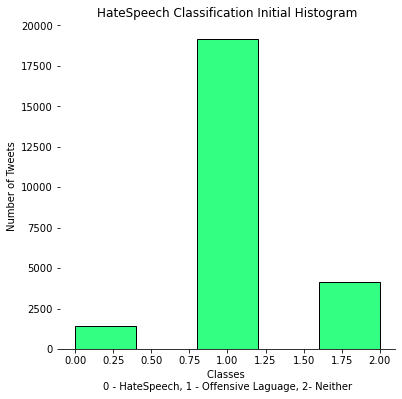

In [8]:
fig, ax = plt.subplots(figsize = (6, 6))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.hist(ClassLabel, bins=5, color='#33FF83', density=False, edgecolor='black')
plt.title('HateSpeech Classification Initial Histogram')
plt.xlabel('Classes \n0 - HateSpeech, 1 - Offensive Laguage, 2- Neither')
plt.ylabel('Number of Tweets')
plt.show()

# Preprocessing

In [9]:
print(tweets)

0        !!! RT @mayasolovely: As a woman you shouldn't...
1        !!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2        !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3        !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4        !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
                               ...                        
24778    you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779    you've gone and broke the wrong heart baby, an...
24780    young buck wanna eat!!.. dat nigguh like I ain...
24781                youu got wild bitches tellin you lies
24782    ~~Ruffled | Ntac Eileen Dahlia - Beautiful col...
Name: tweet, Length: 24783, dtype: object


In [48]:
corpus = []
num_urls_regExp = '(https?:\/\/t\.co\/\w+)'
char_regExp = '[,\?:\|]'
quoteHtml_regExp = '(&#8220;)|(&#8221;)'
andHtml_regExp = '(&amp;)'
emo_happy = '[&#...[514;]$]+|[&#...[513;]$]+'
for i in range(0, len(tweets)):
    tweetsUpdated = re.sub(num_urls_regExp, '',tweets[i]).split()         # 3.1.1 - removing URLS & numbers
    tweetsUpdated = " ".join(tweetsUpdated)                               # joining the string after split
    tweetsUpdated = re.sub(andHtml_regExp,'and',tweetsUpdated).split()    # replacemnt of html_and_code with text and
    tweetsUpdated = " ".join(tweetsUpdated)                               # joining the string after split
    tweetsUpdated = re.sub(char_regExp, ' ',tweetsUpdated).split()               # 3.1.1 - removing ,:|?
    tweetsUpdated = " ".join(tweetsUpdated)                               # joining the string after split
    tweetsUpdated = re.sub(quoteHtml_regExp,'',tweetsUpdated)             # removing quotation marks in html codes
    tweetsUpdated = tweetsUpdated.lower().split()                         # 3.1.2 - converting to lower characters and removing spaces from left and right
    tweetsUpdated = " ".join(tweetsUpdated)                               # joining the string after split
    tweetsUpdated = re.sub(emo_happy,'happy',tweetsUpdated)
#     tweetsUpdated = clean(tweetsUpdated)                                  # 3.1.3 - cleaning data for segmentation
#     tweetsUpdated = segment(tweetsUpdated)                                # 3.1.3 - word segmentation using word segment module
#     tweetsUpdated = " ".join(tweetsUpdated)                               # joining the string after split
    corpus.append(tweetsUpdated)                                          # Inserting the updated tweets into a corpus i.e. list of words

In [47]:
corpus[958]

"&#128129;&#128513;&#128586;- lmao my nigga . let's go half on a weed brownie &#128553; we will be laughing hard as hell in senior seminar"

In [33]:
df1 = pd.DataFrame(corpus)

In [34]:
df1['ClassLabel'] = ClassLabel 

In [35]:
df1.columns = ['tweets','ClassLabel']

In [36]:
df1.to_csv(r'C:\Users\MrPablo\Desktop\updated_dataframe_with_no_urls_no_four_characters_and_numbers_and_in_lower_case_htmlAnd_htmlQuote.csv', index = False, header=True)